<a href="https://colab.research.google.com/github/vijayakumarpattanashetti/ML-CV-Image-and-Video-Processing/blob/master/canny_edge_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/train/flickr30k_images

/content/gdrive/My Drive/train/flickr30k_images


In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
# defining the canny edge detector function

def cannyDetector(img, weak_threshold = None, strong_threshold = None):
	
	# Preliminary: Conversion of image to grayscale
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	# Step 1: Noise reduction
	img = cv2.GaussianBlur(img, (5, 5), 1.4)
	
	# Step 2: Gradients calculation
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
	
	# Conversion of Cartesian coordinates to polar
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
	# setting the minimum and maximum thresholds for double thresholding
	mag_max = np.max(mag)
	if not weak_threshold:weak_threshold = mag_max * 0.1
	if not strong_threshold:strong_threshold = mag_max * 0.5
	
	# getting the dimensions of the input image
	height, width = img.shape
	
	# looping through every pixel of the grayscale image
	for i_x in range(width):
		for i_y in range(height):
			
			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			# selecting the neighbours of the target pixel
			# according to the gradient direction

			# in the x axis direction, angle 0
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# top right (diagnol-1) direction, angle 45
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction, angle 90
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagnol-2) direction, angle 135
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle, angle 180
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Step 3: Non-maximum suppression
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

  # Step 4: Double thresholding
	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)			
	ids = np.zeros_like(img)
	
  # Step 5: Edge tracking by hysteresis
	for i_x in range(width):
		for i_y in range(height):
			
			grad_mag = mag[i_y, i_x]
			
			if grad_mag<weak_threshold:
				mag[i_y, i_x]= 0
			elif strong_threshold>grad_mag>= weak_threshold:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2
	
	
	# return the magnitude of gradients of edges
	return mag

In [5]:
def disp(img):
  plt.figure(figsize=(20, 40))
  plt.imshow(img)

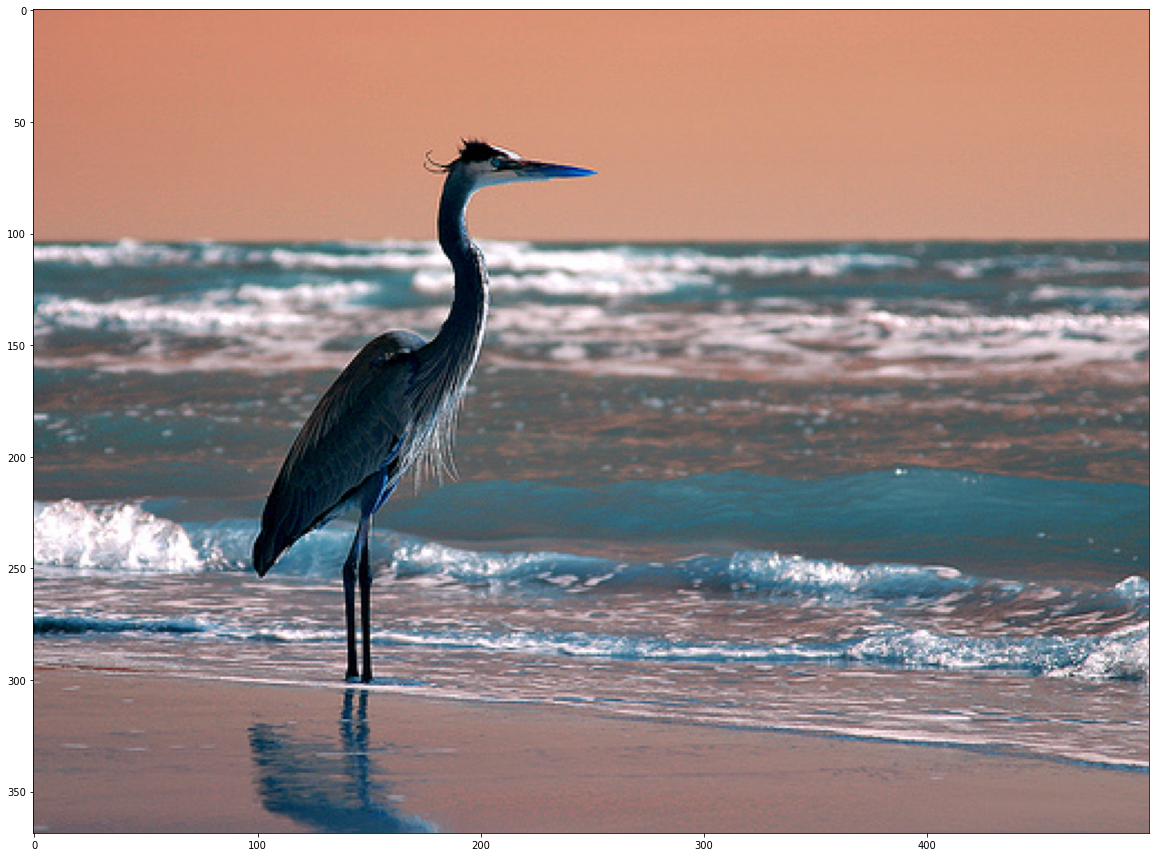

In [7]:
input_img = cv2.imread('/content/gdrive/My Drive/train/flickr30k_images/99679241.jpg')
disp(input_img)

# calling the defined canny edge detector function for finding edges
output_img = cannyDetector(input_img)

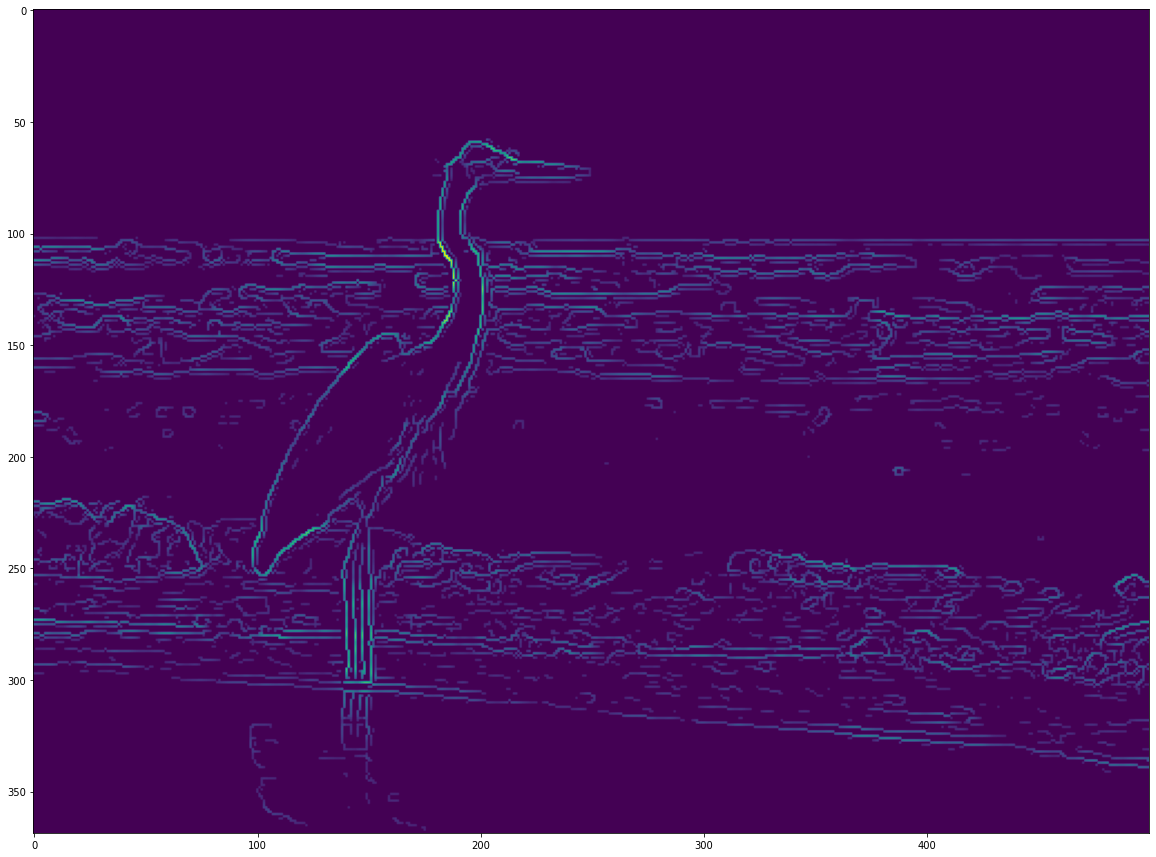

In [8]:
disp(output_img)